# Task 3

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.studyiq.com/articles/per-capita-income-of-india/"
response = requests.get(url)
html_content = response.content

soup = BeautifulSoup(html_content, "html.parser")

# Find all tables on the webpage
tables = soup.find_all("table")

# Check if the second table exists
if len(tables) > 1:
    second_table = tables[1]
    
    # Extract data from the second table
    states = []
    per_capita_incomes_Rs = []
    per_capita_incomes_Dollar = []

    for row in second_table.find_all("tr")[1:]:
        cells = row.find_all("td")
        state = cells[0].text.strip()
        income = str(cells[1].text.strip().replace(",", ""))
        income_dollar = str(cells[2].text.strip().replace(",", ""))
        states.append(state)
        per_capita_incomes_Rs.append(income)
        per_capita_incomes_Dollar.append(income_dollar)

    df = {
        "State": states,
        "Per_capita_income_Rs": per_capita_incomes_Rs,
        "Per_capita_income_Dollar": per_capita_incomes_Dollar,
    }
    data = pd.DataFrame(df)
    print("Second Table:")
    print(data)
else:
    print("The second table was not found on the webpage.")


Second Table:
                 State Per_capita_income_Rs Per_capita_income_Dollar
0                  Goa              ₹431351                    $5821
1               Sikkim              ₹412754                    $5570
2                Delhi              ₹344136                    $4644
3           Chandigarh              ₹292977                    $3954
4            Karnataka              ₹236451                    $3191
5              Haryana              ₹235707                    $3181
6            Telangana              ₹231103                    $3119
7              Gujarat              ₹212821                    $2872
8           Tamil Nadu              ₹212174                    $2863
9           Puducherry              ₹206888                    $2792
10              Kerala              ₹205067                    $2767
11         Maharashtra              ₹193121                    $2606
12   Arunachal Pradesh              ₹192360                    $2596
13    Himachal Prade

In [2]:
data.head()

,State,Per_capita_income_Rs,Per_capita_income_Dollar
0,Goa,₹431351,$5821
1,Sikkim,₹412754,$5570
2,Delhi,₹344136,$4644
3,Chandigarh,₹292977,$3954
4,Karnataka,₹236451,$3191


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State                     33 non-null     object
 1   Per_capita_income_Rs      33 non-null     object
 2   Per_capita_income_Dollar  33 non-null     object
dtypes: object(3)
memory usage: 920.0+ bytes


In [4]:
new = data["Per_capita_income_Rs"].str.split("₹", n = 1, expand = True)
data["Rs"]= new[0] 
data["Per_capita_income"]= new[1]
data.drop(columns =["Per_capita_income_Rs"], inplace = True)
data.drop(columns =["Per_capita_income_Dollar"], inplace = True)
data.drop(columns =["Rs"], inplace = True)

In [5]:
data.head()

,State,Per_capita_income
0,Goa,431351
1,Sikkim,412754
2,Delhi,344136
3,Chandigarh,292977
4,Karnataka,236451


In [6]:
data['Per_capita_income'] = data['Per_capita_income'].astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              33 non-null     object
 1   Per_capita_income  33 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 524.0+ bytes


In [8]:
data.drop(17,axis = 0, inplace = True)

In [9]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,State,Per_capita_income
0,Goa,431351
1,Sikkim,412754
2,Delhi,344136
3,Chandigarh,292977
4,Karnataka,236451
5,Haryana,235707
6,Telangana,231103
7,Gujarat,212821
8,Tamil Nadu,212174
9,Puducherry,206888


In [10]:
data_df = data

In [11]:
data_df = pd.DataFrame(data_df)

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
data.sort_values(["State"],axis=0, ascending=True,inplace=True,na_position='first')

In [14]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,State,Per_capita_income
0,Andhra Pradesh,176707
1,Arunachal Pradesh,192360
2,Assam,86857
3,Bihar,43605
4,Chandigarh,292977
5,Chhattisgarh,104943
6,Delhi,344136
7,Goa,431351
8,Gujarat,212821
9,Haryana,235707


In [15]:
data['State'] = data['State'].str.replace('Jammu & Kashmir-UT', 'Jammu & Kashmir')
data_df = data

In [16]:
shapefile_path = "Indian_states.shp"
map_df = gpd.read_file(shapefile_path)

In [17]:
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [18]:
valid_states = data_df['State'].unique()
map_df = map_df[map_df['st_nm'].isin(valid_states)]

In [19]:
merged_df = map_df.merge(data_df, how='left', left_on='st_nm', right_on='State')
merged_df

,st_nm,geometry,State,Per_capita_income
0,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",Assam,86857
1,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",Bihar,43605
2,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",Chandigarh,292977
3,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",Chhattisgarh,104943
4,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",Goa,431351
5,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",Gujarat,212821
6,Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",Haryana,235707
7,Himachal Pradesh,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",Himachal Pradesh,183333
8,Jammu & Kashmir,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",Jammu & Kashmir,102803
9,Jharkhand,"POLYGON ((87.60582 25.31512, 87.61279 25.31184...",Jharkhand,71071


C:\Users\rohan\AppData\Local\Temp\ipykernel_5100\296684080.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


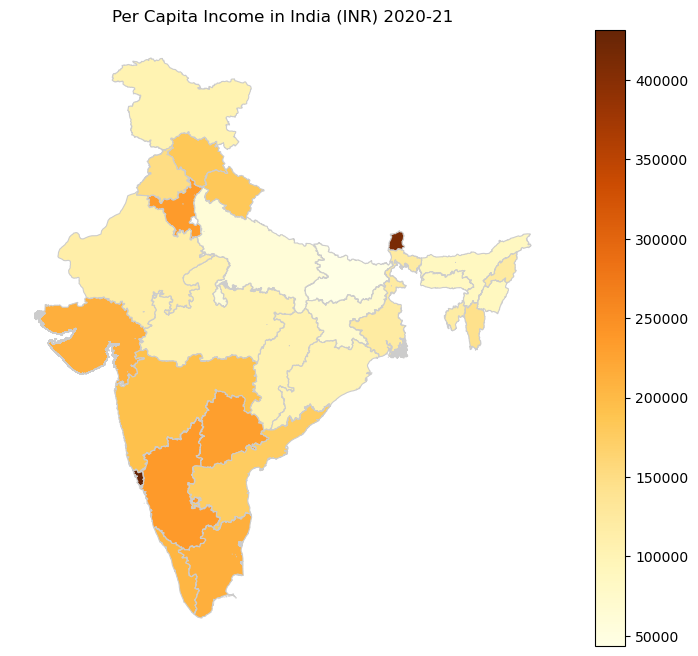

In [20]:
column_to_visualize = 'Per_capita_income'

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

merged_df.plot(column=column_to_visualize, cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.set_title('Per Capita Income in India (INR) 2020-21')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=merged_df[column_to_visualize].min(), vmax=merged_df[column_to_visualize].max()))
sm.set_array([])
cbar = plt.colorbar(sm)

plt.show()